# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [30]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [64]:
names_list=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",names=names_list,delim_whitespace=True)
df1.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [66]:
df1.shape

(406, 9)

In [67]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [68]:
df1.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [69]:
#Replacing the missing values with median
df1.replace(np.nan,df['mpg'].describe().median(),inplace=True)
df1.replace(np.nan,df['horsepower'].describe().median(),inplace=True)

In [37]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [70]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.763087,-0.791685,-0.752416,-0.823668,0.409903,0.566474,0.561214
cylinders,-0.763087,1.000000,0.951787,0.834068,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.791685,0.951787,1.000000,0.885708,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.752416,0.834068,0.885708,1.000000,0.852660,-0.690060,-0.423476,-0.435100
weight,-0.823668,0.895220,0.932475,0.852660,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.409903,-0.522452,-0.557984,-0.690060,-0.430086,1.000000,0.301992,0.218845
model year,0.566474,-0.360762,-0.381714,-0.423476,-0.315389,0.301992,1.000000,0.187656
origin,0.561214,-0.567478,-0.613056,-0.435100,-0.584109,0.218845,0.187656,1.000000


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


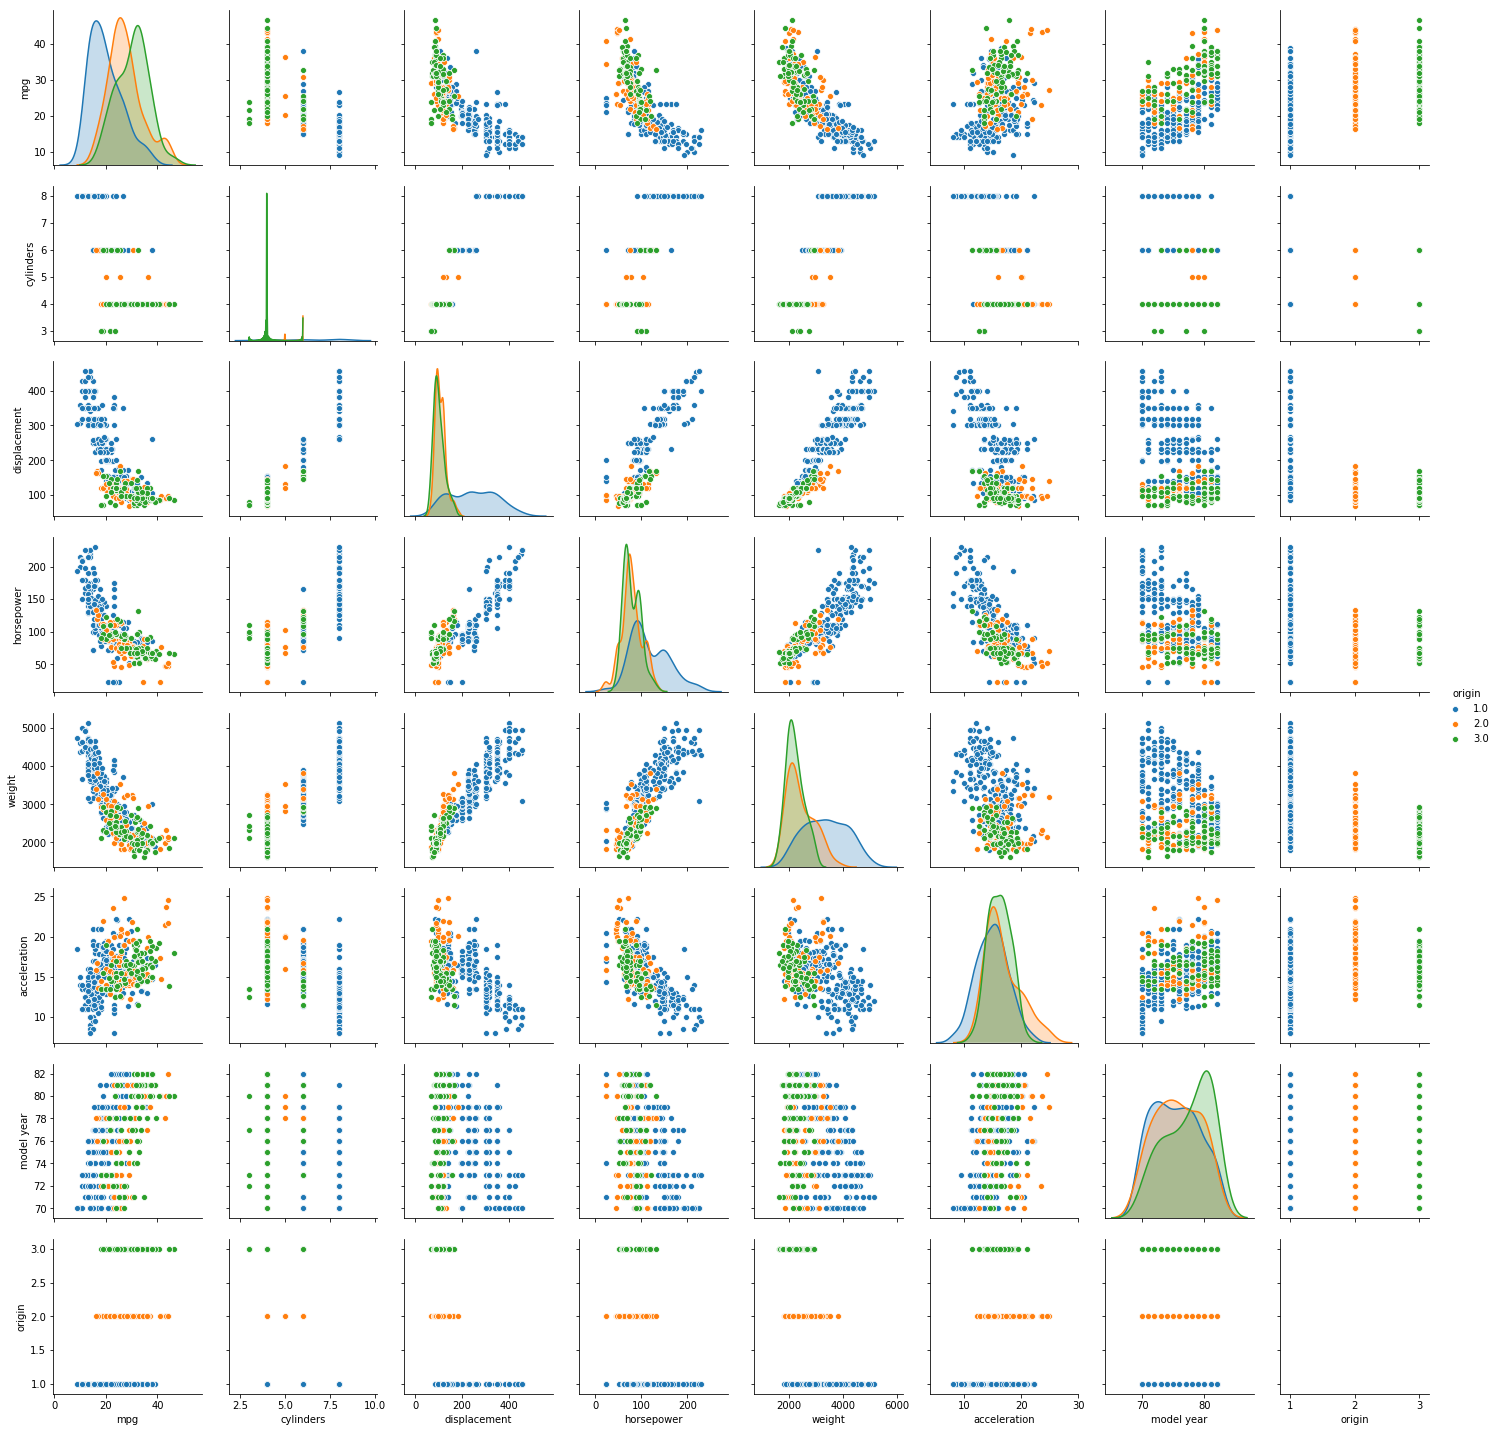

In [71]:
sns.pairplot(df1,diag_kind='kde',hue='origin')

In [72]:
#Observations
#Cylunders are highly correlated with displacement,weight and horse power
#Origin is a categorical data and is observed that there are 3 categories
#Acceleration is normally distributed as mean and median are almost same.
#Cylinders is also ordinal variable.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [ ]:


# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age


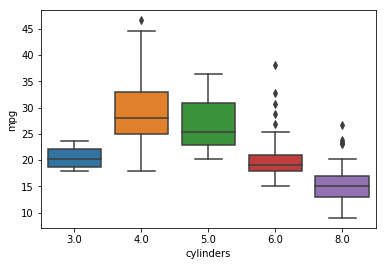

In [72]:
# Further dig into data shows max mpg is for 4 cylinders vehicles
sns.boxplot(x=df1['cylinders'],y=df1['mpg'])

In [73]:
# Origin as pointed earlier indicates production point so should be broken into dummy variables

df_d=pd.get_dummies(df1['origin'],prefix='origin',prefix_sep='_')
df=pd.concat([df1,df_d],axis=1,sort=False)
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_1.0,origin_2.0,origin_3.0
187,25.0,4.0,121.0,115.0,2671.0,13.5,75.0,2.0,saab 99le,0,1,0
315,33.5,4.0,151.0,90.0,2556.0,13.2,79.0,1.0,pontiac phoenix,1,0,0
179,25.0,4.0,90.0,71.0,2223.0,16.5,75.0,2.0,volkswagen dasher,0,1,0
49,12.0,8.0,383.0,180.0,4955.0,11.5,71.0,1.0,dodge monaco (sw),1,0,0
198,22.0,6.0,225.0,100.0,3233.0,15.4,76.0,1.0,plymouth valiant,1,0,0


In [88]:
#droping origin column
df.drop('origin',axis=1,inplace=True)


In [89]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1.0,origin_2.0,origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,1,0,0


In [90]:
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age
df['Age']=83-df['model year']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1.0,origin_2.0,origin_3.0,Age
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,1,0,0,13.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,1,0,0,13.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,1,0,0,13.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,1,0,0,13.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,1,0,0,13.0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [78]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

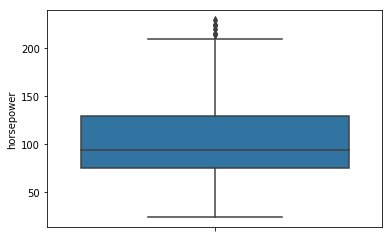

In [91]:
sns.boxplot(y=df['horsepower'])

In [92]:
df.head()
#removing car name and model year from attributes

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1.0,origin_2.0,origin_3.0,Age
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,1,0,0,13.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,1,0,0,13.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,1,0,0,13.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,1,0,0,13.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,1,0,0,13.0


In [93]:
df.pop('model year')

0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
5      70.0
6      70.0
7      70.0
8      70.0
9      70.0
10     70.0
11     70.0
12     70.0
13     70.0
14     70.0
15     70.0
16     70.0
17     70.0
18     70.0
19     70.0
20     70.0
21     70.0
22     70.0
23     70.0
24     70.0
25     70.0
26     70.0
27     70.0
28     70.0
29     70.0
       ... 
376    82.0
377    82.0
378    82.0
379    82.0
380    82.0
381    82.0
382    82.0
383    82.0
384    82.0
385    82.0
386    82.0
387    82.0
388    82.0
389    82.0
390    82.0
391    82.0
392    82.0
393    82.0
394    82.0
395    82.0
396    82.0
397    82.0
398    82.0
399    82.0
400    82.0
401    82.0
402    82.0
403    82.0
404    82.0
405    82.0
Name: model year, Length: 406, dtype: float64

In [94]:
df.pop('car name')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_1.0,origin_2.0,origin_3.0,Age
0,18.0,8.0,307.0,130.0,3504.0,12.0,1,0,0,13.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,1,0,0,13.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,1,0,0,13.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,1,0,0,13.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,1,0,0,13.0


In [95]:
from scipy.stats import zscore

df_n = df.apply(zscore)

In [96]:
df_n.shape

(406, 10)

# Q7. Create appropriate clusters with the new data set

In [97]:
cluster = KMeans( n_clusters = 3, random_state = 472 )
cluster.fit(df_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=472, tol=0.0001, verbose=0)

In [98]:
centroids = cluster.cluster_centers_
centroids

array([[-1.08524384,  1.46521053,  1.44785404,  1.4295646 ,  1.34417557,
        -1.03904561,  0.77357947, -0.46820852, -0.49151827,  0.6275854 ],
       [ 0.72721039, -0.78966676, -0.8476279 , -0.61082625, -0.77687222,
         0.34447824, -1.29269201,  0.78240108,  0.82135291, -0.18797959],
       [ 0.02291694, -0.22696482, -0.15560559, -0.38428654, -0.15472388,
         0.38079931,  0.77357947, -0.46820852, -0.49151827, -0.25049376]])

In [99]:
distorsion=cluster.inertia_
distorsion

1689.0399055230807

In [100]:
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','origin_1.0','origin_2.0','origin_3.0','Age']

# Q8. Identify the appropriate clusters with result from above question

In [101]:
centroid_df = pd.DataFrame(centroids,columns=names)
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_1.0,origin_2.0,origin_3.0,Age
0,-1.085244,1.465211,1.447854,1.429565,1.344176,-1.039046,0.773579,-0.468209,-0.491518,0.627585
1,0.727210,-0.789667,-0.847628,-0.610826,-0.776872,0.344478,-1.292692,0.782401,0.821353,-0.187980
2,0.022917,-0.226965,-0.155606,-0.384287,-0.154724,0.380799,0.773579,-0.468209,-0.491518,-0.250494


In [102]:
prediction=cluster.predict(df_n)

In [103]:
df_n["GROUP"] = prediction 

# Q9. Check for no of values in each cluster and centers for each variables. 

In [104]:
df_n['GROUP'].value_counts()

1    152
2    149
0    105
Name: GROUP, dtype: int64

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2CA1787F0>,
      dtype=object)

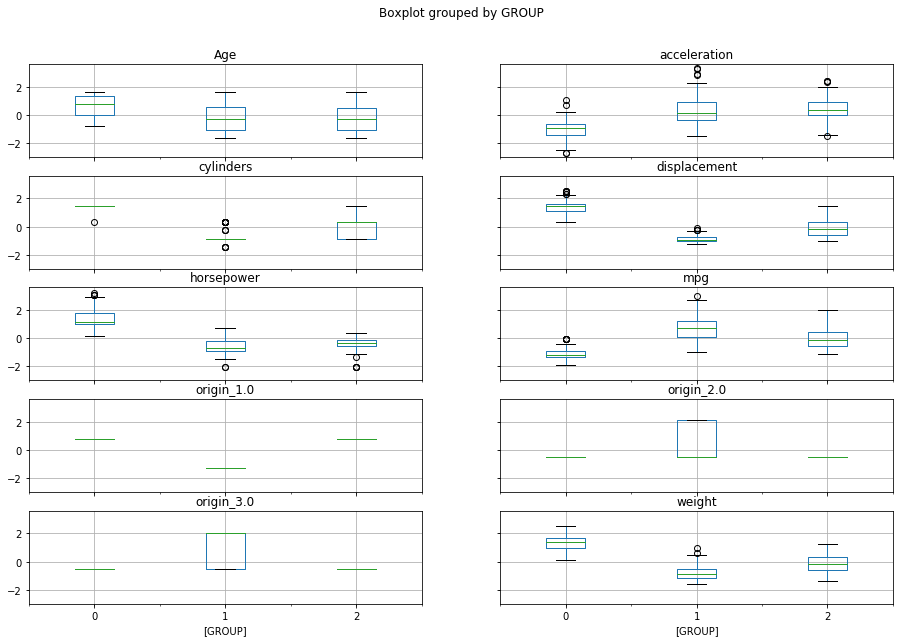

In [106]:
import matplotlib.pylab as plt

df_n.boxplot(by = 'GROUP',  layout=(5,2), figsize=(15, 10))

In [ ]:
#Except age other are having many outliers
#All the group 0 cars have 8 cylinders, so horsepower is also high compare to group 1 and group 2
#mpg is high for group 1 cars

In [120]:
df_g=df_n['GROUP']

In [121]:
df_f=df1.join(df_g)
df_f.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,GROUP
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0


In [123]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('G:\groups.xls')
df_f.to_excel(writer,'Sheet1')
writer.save()

In [97]:
#all the 3 groups were correctly classified
